# The Central Limit Theorem

The *Central Limit Theorem* states that if we draw a simple random sample of size $n$ from any population with mean $\mu$ and standard deviation $\sigma$, if $n$ is large the distribuion of the sample means is approximately normal of the form

$$N(\mu, \frac{\sigma}{n})$$

This activity is meant to offer an example of the central limit theorem in action, and the effect of using different sample sizes in forming the distribution of sample means. 

### Baseball Salaries

![](images/baseballs.png)


The dataset below represents Major League Baseball player salaries from the year 2020, and was gathered from USA Today's databases. Below, the dataset is loaded and we examine the features and datatypes. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#read in the data
baseball_salaries = pd.read_csv('data/baseball.csv', index_col=0)

In [3]:
#Examine the .info()
baseball_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797 entries, 1 to 797
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team         797 non-null    object
 1   leagueID     797 non-null    object
 2   player       797 non-null    object
 3   salary       797 non-null    int64 
 4   position     797 non-null    object
 5   gamesplayed  797 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 43.6+ KB


In [4]:
#First few rows
baseball_salaries.head()

,team,leagueID,player,salary,position,gamesplayed
1,ANA,AL,anderga0,6200000,CF,112
2,ANA,AL,colonba0,11000000,P,3
3,ANA,AL,davanje0,375000,CF,108
4,ANA,AL,donnebr0,375000,P,5
5,ANA,AL,eckstda0,2150000,SS,142


### Task

Our goal is to take samples from the salary data and build a distribution of these sample means.  To begin, draw a histogram of the salaries.  Note the skew and lack of normality in this distribution.    

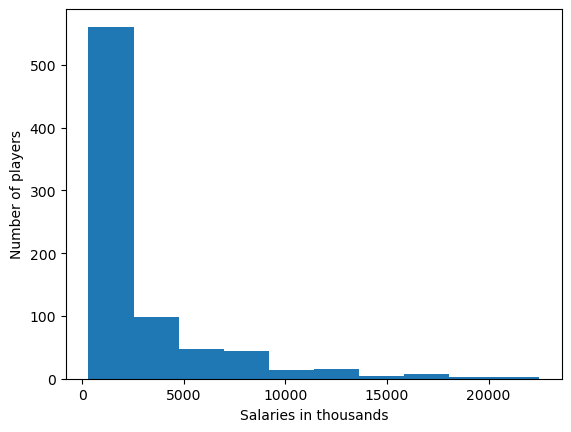

In [81]:
#histogram of the salaries
plt.hist(baseball_salaries['salary'] / 1000)
plt.xlabel('Salaries in thousands')
plt.ylabel('Number of players')
plt.show
plt.savefig('salary_hist.png')

### Taking Samples

Pandas DataFrame's have built in methods for taking random samples with replacement.  The `.sample()` method is demonstrated below.

In [19]:
baseball_salaries['salary'].sample(4)

170    2500000
161    9500000
300     305000
292     300000
Name: salary, dtype: int64

### Sample Means

Now, use this method to repeatedly take samples and build a list of sample means.  As a starting place let us take 1000 samples of size 5 and draw the histogram of the sample means.  What is the mean and standard deviation? 

In [40]:
#empty list for sample means
sample_means = []
for i in range(1000):
    #your code below
    sample = baseball_salaries['salary'].sample(5)
    sample_means.append(sample.mean() / 1000)
    pass

<function matplotlib.pyplot.show(close=None, block=None)>

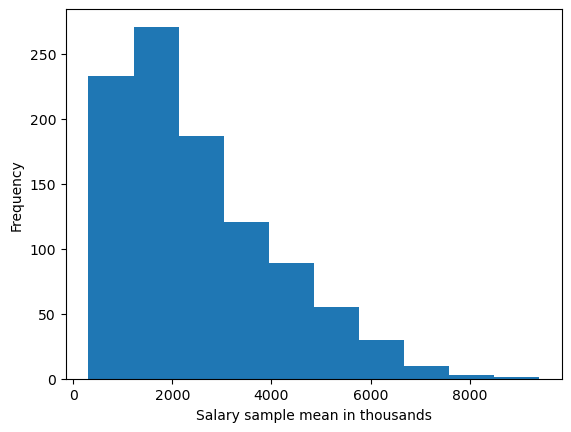

In [43]:
#histogram of sample means
plt.hist(sample_means)
plt.xlabel('Salary sample mean in thousands')
plt.ylabel('Frequency')
plt.show

Repeat the above exercise with samples of size:

- 10
- 25
- 50
- 100

Your discussion post should explain how the distribution of these sample means changes as the sample size changes, and how the mean and standard deviation of the distributions change.

/var/folders/zn/6kw5kv4d2rdc16gj1pm8_9gm0000gp/T/ipykernel_2656/3612687573.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
/var/folders/zn/6kw5kv4d2rdc16gj1pm8_9gm0000gp/T/ipykernel_2656/3612687573.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


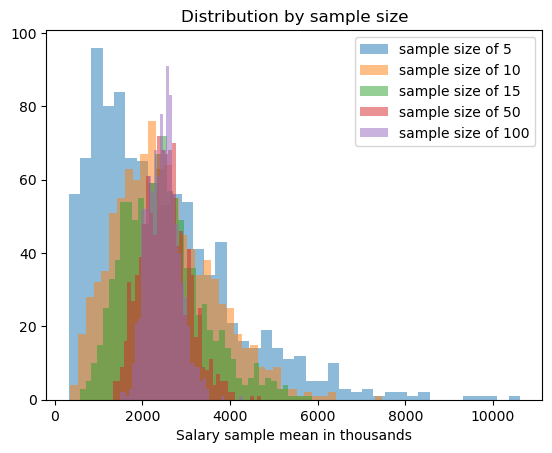

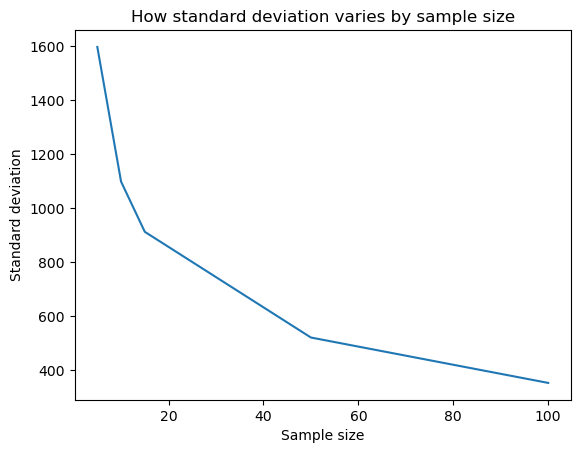

In [82]:
def sample_means(data, sample_size, total_samples):
    sample_means = []
    for i in range(total_samples):
        #your code below
        sample = data.sample(sample_size, replace=True)
        sample_means.append(sample.mean())
        pass
    return sample_means

means = []
stds = []
distributions = []
sample_sizes = [5, 10, 15, 50, 100]
fig1 = plt.figure()
plot1 = fig1.add_subplot(1, 1, 1)
fig2 = plt.figure()
plot2 = fig2.add_subplot(1, 1, 1)
for sample_size in sample_sizes:
    distribution = sample_means(baseball_salaries['salary']/1000, sample_size, 1000)
    means.append(np.mean(distribution))
    stds.append(np.std(distribution))
    distributions.append(distribution)
    plot1.hist(distribution, label = 'sample size of {size}'.format(size=sample_size), bins=40, alpha=0.5)

plot1.set_xlabel('Salary sample mean in thousands')
plot2.set_ylabel('Frequency')
plot1.legend()
plot1.title.set_text('Distribution by sample size')
fig1.show()
fig1.savefig('mean_distribution_by_sample_size.png')

plot2.plot(sample_sizes, stds)
plot2.set_xlabel('Sample size')
plot2.set_ylabel('Standard deviation')
plot2.title.set_text('How standard deviation varies by sample size')
fig2.show()
fig2.savefig('std_by_sample_size.png')
# print(df)

